### importing liabraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### reading csv file

In [2]:
df = pd.read_csv('titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [3]:
df.isnull() # isnull = true if that value is NaN ; ow false

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

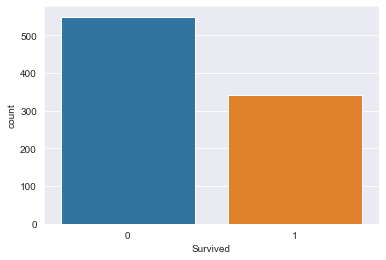

In [7]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived' , data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

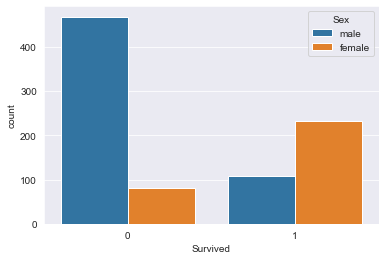

In [8]:
sns.countplot(x = 'Survived' , hue='Sex' ,data =df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

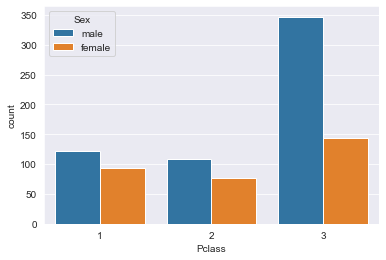

In [9]:
sns.countplot(x = 'Pclass' , hue='Sex' ,data =df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

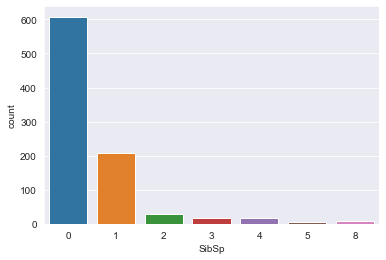

In [10]:
sns.countplot(x = 'SibSp' ,data =df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

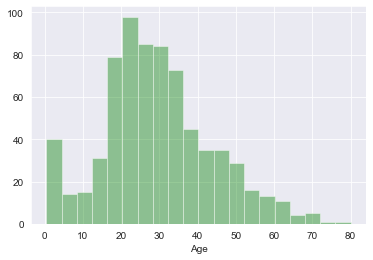

In [11]:
sns.distplot(df['Age'].dropna(),bins=20,kde=False,color='g')

<AxesSubplot:xlabel='Fare'>

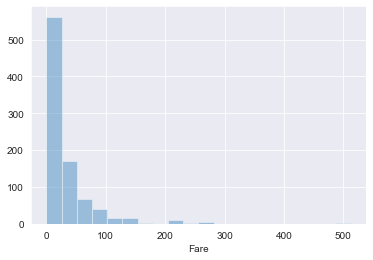

In [12]:
sns.distplot(df['Fare'] , bins=20  , kde=False )

## Data Cleaning 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

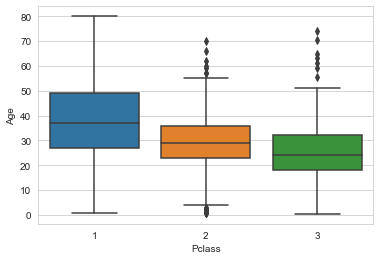

In [13]:
sns.set_style('whitegrid')
sns.boxplot(x = 'Pclass' , y = 'Age' , data = df )

### We are simply imputing the age missing values with its respective mean values 

In [14]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        
        if Pclass == 1:
            return  37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
    

In [15]:
df['Age'] = df[["Age" , "Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

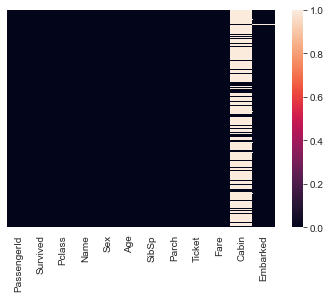

In [16]:
sns.heatmap(data =df.isnull(),yticklabels=False )

### We have to drop the cabin column as it contains so many null values , around 80 percent

In [17]:
df.drop(labels='Cabin' , axis=1 , inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<AxesSubplot:>

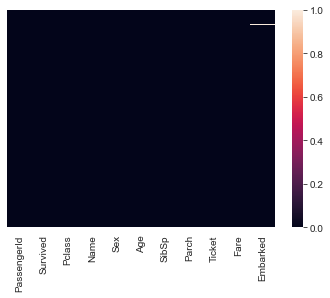

In [19]:
sns.heatmap(data = df.isnull() , yticklabels=False)

In [20]:
df = df.dropna(subset=['Embarked'])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting categorical values to dummy values 
- Sex and Embarked are 2 columns with categorical values 
- So we have to convert them into dummy variables so as to feed to the algorithm

In [21]:
sex = pd.get_dummies(data = df['Sex'] , drop_first=True)
embark = pd.get_dummies(data = df['Embarked'] , drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [23]:
df.drop(['PassengerId' , 'Name' , 'Sex' , 'Ticket' , 'Embarked'] , axis = 1 , inplace=True )

In [24]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [25]:
df = pd.concat([df,sex,embark] ,axis = 1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


## Building Simple classification model

#### 1. Divide the whole dataset into dependent and independent columns 

In [26]:
X = df.drop(['Survived'],axis=1)
y  = df['Survived']
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

#### 2. Splitting the train and test data

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)
X_train.shape
X_test.shape

(267, 8)

### Building model

In [29]:
 from sklearn.linear_model  import LogisticRegression

In [30]:
log_reg = LogisticRegression()

In [31]:
# Fit the model according to the given training data.
log_reg.fit(X_train , y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred = log_reg.predict(X_test)

### Checking Accuracy using confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_test , pred)
cm

array([[138,  29],
       [ 25,  75]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score


In [36]:
acc_score = accuracy_score(y_test , pred)

In [37]:
print("Accuracy score is : {:4f}".format(acc_score*100) , "%")

Accuracy score is : 79.775281 %
